<a href="https://colab.research.google.com/github/VaSiluck/Game_of_thrones_death_analysis/blob/main/week_01_ml_intro/Homework/hw_1_game_of_thrones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

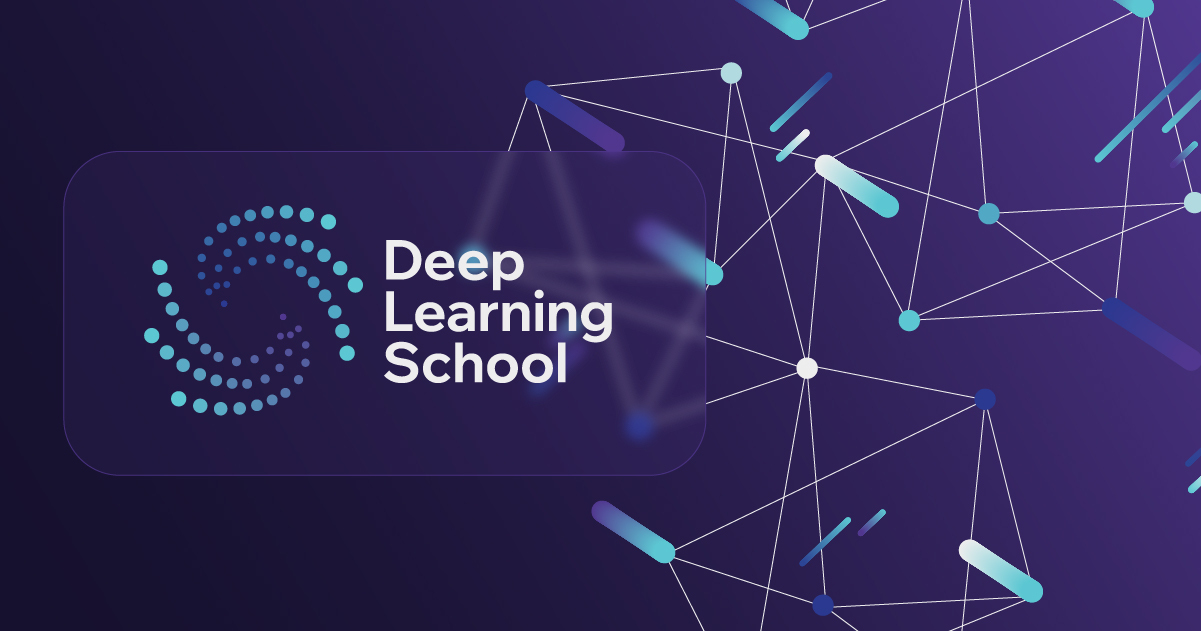

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ</b></h3>

<h1 style="text-align: center;"><b>Домашнее задание. Библиотека sklearn и классификация с помощью KNN</b></h1>

## Описание домашнего задания

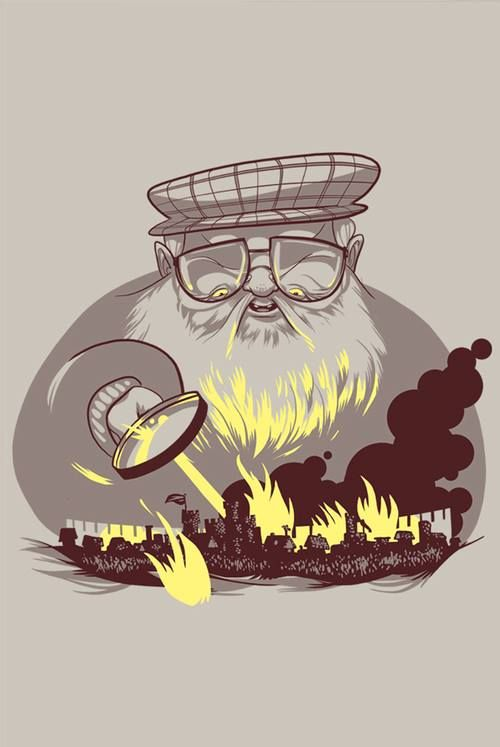

В данном задании вы будете работать с датасетом о персонажах из вселенной Игры Престолов [A Wiki of Ice and Fire](http://awoiaf.westeros.org/). Вам предстоит предсказать, кто из персонажей умрет, а кто останется вживых.



Описание данных:

* **name**: Имя персонажа

* **Title**: Социальный статус или знатность

* **House**: Дом, к которому принадлежит персонаж

* **Culture**: Социальная группа, к которой принадлежит персонаж

* **book1/2/3/4/5**: Появление персонажа в книге

* **Is noble**: Знатность персонажа, основанное на титуле

* **Age**: Отсчет времени: 305 AC

* **male**: Мужчина или женщина

* **dateOfBirth**: дата рождения

* **Spouse**: Имя супруги\а персонажа

* **Father**: Имя отца персонажа

* **Mother**: Имя матери персонажа

* **Heir**: Имя наследника персонажа

* **Is married**: Represents whether the character is married

* **Is spouse alive**: Represents whether character's spouse is alive

* **Is mother alive:** Жива ли мать персонажа

* **Is heir alive:** Жив ли наследник персонажа

* **Is father alive:** Указывает, жив ли отец персонажа

* **Number dead relations:** Количество умерших персонажей, с которыми персонаж связан

* **Popularity score:** Количество внутренних входящих и исходящих ссылок на страницу персонажей в вики http://awoiaf.westeros.org

Целевая переменная:
* **isAlive**: жив ли персонаж в книге

Оценивание:

Баллы считаются следующим образом:

1) $1.00 \geqslant score \geqslant 0.65$ --- 5 баллов

2) $0.65 > score \geqslant 0.50$ --- 4 балла

3) $0.50 > score \geqslant 0.45$ --- 3 балла

4) $0.45 > score \geqslant 0.40$ --- 2 балла

5) $0.40 > score \geqslant 0.35$ --- 1 балл

6) $0.35 > score$ --- 0 баллов

## Часть 1. Анализ и предобработка данных

Здесь вам необходимо сделать все шаги, которые обсуждались в первой части семинара.
* Предобработка данных
  * Обработка пропущенных данных
  * Создание новых признаков
  * Удаление ненужных столбцов
* Анализ данных
  * Анализ целевой переменной
  * Анализ признаков
  * Анализ влияния признаков на целевую переменную
* Подготовка данных для обучения модели

Загружаем датасет

In [568]:
!gdown 1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3 # test dataset
!gdown 1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v # train dataset

Downloading...
From: https://drive.google.com/uc?id=1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3
To: /content/game_of_thrones_test.csv
100% 37.3k/37.3k [00:00<00:00, 57.7MB/s]
Downloading...
From: https://drive.google.com/uc?id=1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v
To: /content/game_of_thrones_train.csv
100% 138k/138k [00:00<00:00, 81.0MB/s]


**Задание 1.1.** Импортируйте библиотеки pandas, matplotlib, seaborn

In [569]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
pd.set_option('display.max_columns', None)

**Задание 1.2.** Загрузите датасет в Pandas DataFrame при помощи функции `read_csv`. Вместо дефолтных наименований строк `0,1,...`, при помощи параметра `index_col`, сделайте значения колонки `S.No` наименованиями строк:

In [570]:
data = pd.read_csv('game_of_thrones_train.csv', index_col='S.No')
data_test = pd.read_csv('game_of_thrones_test.csv', index_col='S.No')
data

,name,title,male,culture,dateOfBirth,mother,father,heir,house,spouse,book1,book2,book3,book4,book5,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive
S.No,,,,,,,,,,,,,,,,,,,,,,,,,
1,Viserys II Targaryen,NaN,1,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,NaN,0,0,0,0,0,1.0,0.0,0.0,NaN,0,0,NaN,11,0.605351,0
2,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,NaN,NaN,NaN,House Frey,Perra Royce,1,1,1,1,1,NaN,NaN,NaN,1.0,1,1,97.0,1,0.896321,1
3,Addison Hill,Ser,1,NaN,NaN,NaN,NaN,NaN,House Swyft,NaN,0,0,0,1,0,NaN,NaN,NaN,NaN,0,1,NaN,0,0.267559,1
4,Aemma Arryn,Queen,0,NaN,82.0,NaN,NaN,NaN,House Arryn,Viserys I Targaryen,0,0,0,0,0,NaN,NaN,NaN,0.0,1,1,23.0,0,0.183946,0
5,Sylva Santagar,Greenstone,0,Dornish,276.0,NaN,NaN,NaN,House Santagar,Eldon Estermont,0,0,0,1,0,NaN,NaN,NaN,1.0,1,1,29.0,0,0.043478,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,Marwyn,Archmaester,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,1,1,0,NaN,NaN,NaN,NaN,0,1,NaN,0,0.160535,1
1554,Masha Heddle,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,0,0,0,NaN,NaN,NaN,NaN,0,0,NaN,0,0.040134,0
1555,Matthos Seaworth,NaN,1,NaN,NaN,NaN,NaN,NaN,House Seaworth,NaN,0,1,1,1,1,NaN,NaN,NaN,NaN,0,0,NaN,0,0.076923,0


Посмотрите, какие типы данных представлены в нашем датасете

Знакомый нам метод describe() возвращает различную информацию для столбцов с числовыми типами данных, и с типами данных *object*

Давайте посмотрим на вывод для типа данных *object*. Для этого:
- сначала применим метод describe(). Укажем в качестве аргумента тип данных столбцов, статистику по которым мы хотим посмотреть (см. https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html)
- для удобства восприятия транспонируем таблицу

In [571]:
data.describe(include = 'object').T

,count,unique,top,freq
name,1557,1557,Melara Hetherspoon,1
title,717,195,Ser,306
culture,488,51,Northmen,94
mother,18,16,Rhaenyra Targaryen,2
father,22,19,Daemon Targaryen,2
heir,21,20,Jaehaerys Targaryen,2
house,1176,315,House Frey,89
spouse,200,186,Walder Frey,6


Теперь давайте посмотрим на столбцы с числовыми типами данных. Дополните код ниже. Для удобства восприятия мы транспонировали таблицу и ограничили вывод тремя столбцами - количество строк без NaN, максимальное и минимальное значение (о кастомизации вариантах вывода describe() вы можете почитать в документации по ссылке выше).


In [572]:
data.describe(include = ['number']).T[['count', 'min', 'max']]

,count,min,max
male,1557.0,0.0,1.0
dateOfBirth,279.0,-25.0,299.0
book1,1557.0,0.0,1.0
book2,1557.0,0.0,1.0
book3,1557.0,0.0,1.0
book4,1557.0,0.0,1.0
book5,1557.0,0.0,1.0
isAliveMother,18.0,0.0,1.0
isAliveFather,22.0,0.0,1.0
isAliveHeir,21.0,0.0,1.0


Так мы проверим, есть ли в данных неадекватнные значения.   Большинство числовых столбцов - это числа от 0 до 1. Отрицательные значения `dateOfBirth` не являются ошибкой. Значения age и `numDeadRelations` также выглядят адекватными. Можно переходить к дальнейшим шагам анализа (анонс - а в тестовых данных нас будет ждать сюрприз).

**Задание 1.3.** Предобработка (очистка) данных.

В нашем домашнем задании все пропуски в данных (missing values) уже закодированы как NaN. Проанализируйте, в каких колонках и как часто встречаются NaN значения. Далее вам надо будет принять решение, как их обрабатывать.

В этом задании удалять строки с NaN (dropna) мы не будем по следующим причинам:
- в обучающем датасете много признаков с большим количество пропусков. Если удалять все строки с NaN, то размер выборки сильно уменьшится. Мы потеряем много данных, которые можно было бы использовать для построения более точной модели.
- тестовом датасете также много признаков с NaN (вы можете в этом убедиться, если скачаете датасет и совершите с ним те же действия, что выше проделали с обучаюшим датасетом). Поэтому нам все-равно придется придумать способ кодировать NaN, чтобы модель делала прогнозы для всех персонажей из тестового датасета. Для этого нам потребуется сохранять, а не удалять данные в обучающем датасете.     



In [573]:
data.isna().sum()

,0
name,0
title,840
male,0
culture,1069
dateOfBirth,1278
mother,1539
father,1535
heir,1536
house,381
spouse,1357


In [574]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1557 entries, 1 to 1557
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              1557 non-null   object 
 1   title             717 non-null    object 
 2   male              1557 non-null   int64  
 3   culture           488 non-null    object 
 4   dateOfBirth       279 non-null    float64
 5   mother            18 non-null     object 
 6   father            22 non-null     object 
 7   heir              21 non-null     object 
 8   house             1176 non-null   object 
 9   spouse            200 non-null    object 
 10  book1             1557 non-null   int64  
 11  book2             1557 non-null   int64  
 12  book3             1557 non-null   int64  
 13  book4             1557 non-null   int64  
 14  book5             1557 non-null   int64  
 15  isAliveMother     18 non-null     float64
 16  isAliveFather     22 non-null     float64
 17  

Как вы могли заметить, в наших данных очень много пропущенных значений, причём в некоторых случая пропущена **большая** часть значений. Поэтому заполнять по умолчанию медианой/средним/модой в данном случае - не самый лучший способ (однако, это довольно часто используемый метод заполнения, который может пригодиться вам в будущем)

Ниже мы посмотрим, как можно работать с признаками с большим количеством пропущенных значений.

**Задание 1.4.** Числовые признаки

У нас есть **признак popularity**. Постройте гистограмму распределения данного признака с количеством интервалов (bins), равным 50 (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.hist.html)

<Axes: xlabel='popularity', ylabel='Count'>

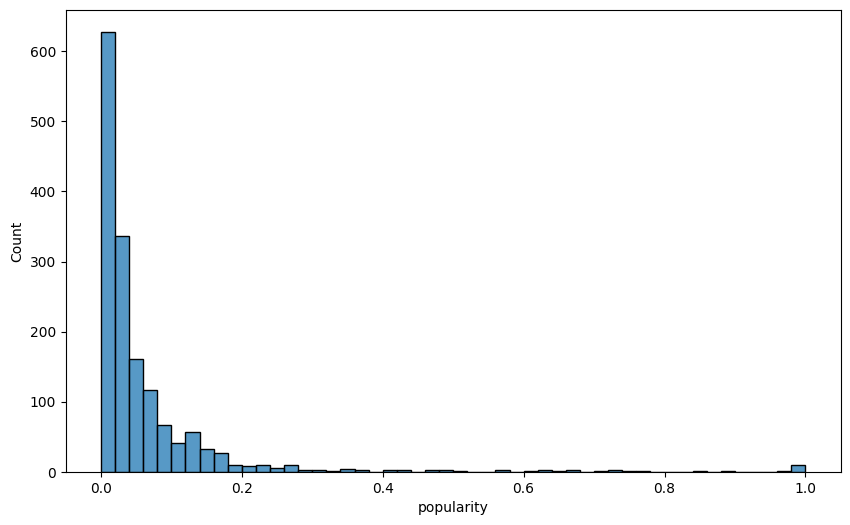

In [575]:
fig = plt.subplots(figsize = (10,6))
sns.histplot(data['popularity'], bins = 50)

Распределение сильно несимметрично. Можно преобразовать данный признак, например, по формуле `np.log10(data["popularity"]*M+1)` (добавляем 1 ради логарифма, так как для нектоторых персонажей `popularity==0`). В качестве M можно попробовать, например, M=100 или другое число.

При желании для `popularity` вы можете использовать свой способ шкалирования признаков с несимметричным распределением.


<Axes: xlabel='popularity', ylabel='Count'>

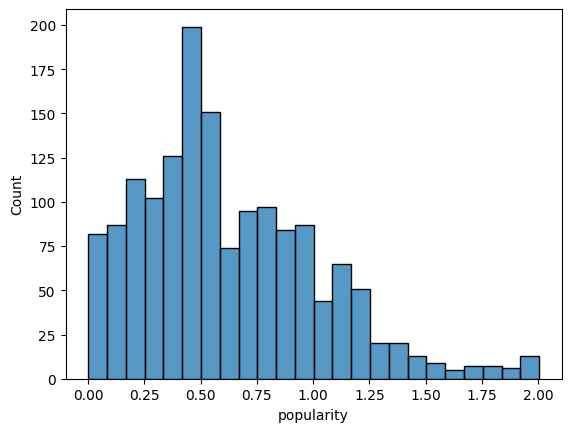

In [576]:
M = 100
data["popularity"] = np.log10(data["popularity"]*M+1)
sns.histplot(data['popularity'])

В качестве альтернативного подхода вы можете попробовать дискретизацию признака popularity на основе квантилей (quantile binning), используя функцию qcut() (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.qcut.html). В этом случае вы преобразуете числовой признак popularity в категориальный, для которого в дальнейшем надо будет применить one-hot кодирование.

Теперь давайте обработаем **признак numDeadRelations**.
Посмотрите на частотное распределение этого признака. Лишь для малого числа персонажей `numDeadRelations>0`.

Создайте признак `boolDeadRelations`. Давайте упростим признак `numDeadRelations`, и просто поделим людей на тех, у кого были хоть какие то отношения с мертвыми персонажами, т.е. `numDeadRelations > 0`, и те, у которых не было, т.е. `numDeadRelations = 0`.

<Axes: xlabel='boolDeadRelations', ylabel='count'>

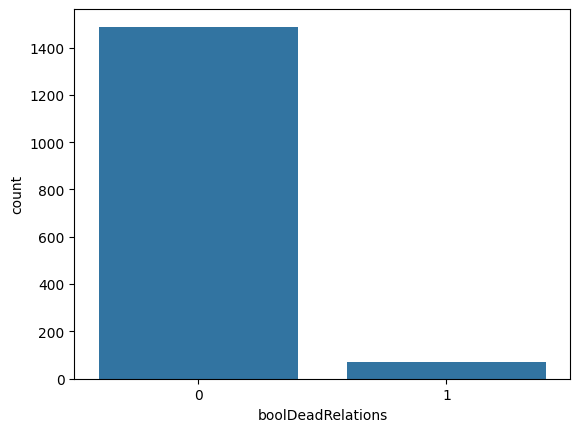

In [577]:
data['boolDeadRelations'] = np.where(data['numDeadRelations'] > 0, 1, 0)
sns.countplot(x = 'boolDeadRelations', data = data)

Наконец, давайте посмотрим на **признак age**. В нем очень много пропущенных значений. Для того, чтобы использовать в модели информацию о возрасте персонажа, мы создадим два новых признака: `age_value` и `age_no_data`

- Там где возраст указан, age_value принимает значение `age`, а `age_no_data` - значение 0.
- Там где возраст не указан, `age_value` принимает значение 0, а `age_no_data` - значение 1.  

Фактически, в переменной `age` мы заменяем NaN на 0, но одновременно добавляем в модель еще один бинарный признак `age_no_data`, несущий информацию о том, у каких персонажей не был указан возраст:        

In [578]:
data_test.describe(include = ['number']).T[['count', 'min', 'max']].assign(N_unique_values = data_test.nunique())

,count,min,max,N_unique_values
male,389.0,0.0,1.0,2
dateOfBirth,154.0,-28.0,298299.0,85
book1,389.0,0.0,1.0,2
book2,389.0,0.0,1.0,2
book3,389.0,0.0,1.0,2
book4,389.0,0.0,1.0,2
book5,389.0,0.0,1.0,2
isAliveMother,3.0,1.0,1.0,1
isAliveFather,4.0,0.0,0.0,1
isAliveHeir,2.0,0.0,1.0,2


In [579]:
data['age_value'] = data['age'].fillna(0)
data_test['age_value'] = data_test['age'].fillna(0)

data['dob_value'] = data['dateOfBirth'].fillna(0)
data_test['dob_value'] = data_test['dateOfBirth'].fillna(0)

96
data['age_or_dob_no_data'] = [1 if np.isnan(x) else 0 for x in data['age']]
data_test['age_or_dob_no_data'] = [1 if np.isnan(x) else 0 for x in data_test['age']]

data = data.drop(columns = ['age', 'dateOfBirth'])
data_test = data_test.drop(columns = ['age', 'dateOfBirth'])

data

,name,title,male,culture,mother,father,heir,house,spouse,book1,book2,book3,book4,book5,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,numDeadRelations,popularity,isAlive,boolDeadRelations,age_value,dob_value,age_or_dob_no_data
S.No,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,Viserys II Targaryen,NaN,1,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,NaN,0,0,0,0,0,1.0,0.0,0.0,NaN,0,0,11,1.789123,0,1,0.0,0.0,1
2,Walder Frey,Lord of the Crossing,1,Rivermen,NaN,NaN,NaN,House Frey,Perra Royce,1,1,1,1,1,NaN,NaN,NaN,1.0,1,1,1,1.957282,1,1,97.0,208.0,0
3,Addison Hill,Ser,1,NaN,NaN,NaN,NaN,House Swyft,NaN,0,0,0,1,0,NaN,NaN,NaN,NaN,0,1,0,1.443355,1,0,0.0,0.0,1
4,Aemma Arryn,Queen,0,NaN,NaN,NaN,NaN,House Arryn,Viserys I Targaryen,0,0,0,0,0,NaN,NaN,NaN,0.0,1,1,0,1.287682,0,0,23.0,82.0,0
5,Sylva Santagar,Greenstone,0,Dornish,NaN,NaN,NaN,House Santagar,Eldon Estermont,0,0,0,1,0,NaN,NaN,NaN,1.0,1,1,0,0.728177,1,0,29.0,276.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,Marwyn,Archmaester,1,NaN,NaN,NaN,NaN,NaN,NaN,1,0,1,1,0,NaN,NaN,NaN,NaN,0,1,0,1.231814,1,0,0.0,0.0,1
1554,Masha Heddle,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,1,1,0,0,0,NaN,NaN,NaN,NaN,0,0,0,0.700130,0,0,0.0,0.0,1
1555,Matthos Seaworth,NaN,1,NaN,NaN,NaN,NaN,House Seaworth,NaN,0,1,1,1,1,NaN,NaN,NaN,NaN,0,0,0,0.939135,0,0,0.0,0.0,1


Этот способ чем-то похож на работу с категориальной переменными с пропущенными значениями, когда мы добавляем еще одну категорию no_data и заменяем NaN на значение этой категории.

Если вы заходите похожим образом образом обработать признак `dateOfBirth`, **обратите внимание**, что у одних и тех же персонажей не указан и возраст, и год рождения.
То есть созданные признаки `age_no_data` и `dateOfBirth_no_data` будут полностью совпадать, и в модель надо будет включать только один из признаков: или `age_no_data`, или `dateOfBirth_no_data`.

**Задание 1.5.** Категориальные признаки с большим количеством категорий

**Признак culture** содержит информацию о принадлежности к одному из народов во вселенной Игры Престолов.

Давайте посмотрим, какие значения принимает данный признак. По умолчанию метод `value_counts()` игнорирует пропуски в данных, поэтому используем этот метод с параметром **dropna** со значением **False** (см. https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.value_counts.html)

In [580]:
data['culture'].value_counts(dropna = False)

,count
culture,
NaN,1069
Northmen,94
Ironborn,91
Free Folk,45
Braavosi,39
Valyrian,28
Ghiscari,17
Dornish,17
Dothraki,17


Из полученного частотного распределения видно, что для большого числа персонажей значения данного признака не указаны. Также есть много редких значений признака, которые в выборке повторяются один или несколько раз. Причина отчасти в том, что один и тот же народ упоминается в нашем датасете под разными названиями.

Данную проблему мы попытаемся решить, сгруппировав народы в более крупные категории. Так мы одновременно решим проблему того, что один и тот же народ назван в выборке разными способами.

Предоженный вариант группировки имеет определенную логику. Выделяются следующие группы:
- старые нации, которые уже не сущевали как отдельные народы на момент повествования основной линии повествования романов, но отдельные потомки могли еще быть живы
- народы, проживающие в королевствах континента Весторос (для каждого королевства - своя группа)
- народы континента Эссос
- прочие народы

In [581]:
cultures_grouped = {
    'Old Nations': ['valyrian', 'first men', 'andal', 'andals', 'rhoynar'],
    'the North': ['northmen', 'northern mountain clans', 'crannogmen'],
    'the Iron Islands': ['ironborn', 'ironborn', 'ironmen'],
    'the Mountain and the Vale': ['valemen', 'vale', 'vale mountain clans',
                              'sistermen'],
    'the Isles and Rivers': ['riverlands', 'rivermen'],
    'the Rock': ['westerman', 'westermen', 'westerlands'],
    'the Stormlands': ['stormlander', 'stormlands'],
    'the Reach': ['reach', 'reachmen', 'the reach'],
    'Dorne': ['dornish', 'dornishmen', 'dorne'],
    'Essos Nations': ['astapor', 'astapori', 'braavosi', 'braavos', 'tyroshi', 'lysene', 'lyseni',
                      'myrish', 'pentoshi', 'qartheen', 'qarth', 'dothraki',
                      'lhazarene', 'lhazareen','meereen', 'meereenese',
                      'norvoshi', 'qohor', 'summer isles', 'summer islands',
                      'summer islander', 'asshai', "asshai'i", 'norvos', 'ghiscari',
                      'ghiscaricari'],
    'Other Nations': ['ibbenese', 'westeros', 'free folk', 'wildling', 'wildlings', 'naathi']}

**Обратите внимание, что некоторые варианты названий народов встречаются только в тестовых данных, и не встречаются в обучающих данных.** Такая ситуация нередко случается на практике. Поэтому, после обработки обучающих данных и обучения модели важно задать для модели правило, как она должна обрабатывать "незнакомые" категории в категориальных признаках. Например, можно относить объекты с "незнакомой" категорией к некоторой существующей категории или указать формулу расчета для "незнакомой" категории.     

Предложенный вам словарь `cultures_grouped` составлен по всем значениям признака `culture`, встречающимся в тренировочном либо в тестовом датасете. Здесь важно, что все укрупненные категории (ключи/keys словаря `cultures_grouped`) представлены в обоих датасетах, а уникальные для тестового датасета названия народов - это отдельные названия народов внутри укрупненных категорий (значения/values словаря). Поэтому, когда вы будете работать с тестовыми - просто применяйте этот словарь без указания правила обработки "незнакомых" категорий.

Давайте приступим к кодировке значений признака culture.
Для этого сначала инвертируем словарь *cultures_grouped*

In [582]:
#Довольно просто инвертировать словарь, где ключу соответствует одно значение
#В нашем случае ключу соответствует список значений.
#Ниже показан пример, как можно инвертировать такой словарь

d = {'A': ['a1', 'a2', 'a3'],
     'B': ['b1', 'b2', 'b3', 'b4']}

d_inverted = {}
for k in d.keys():
  for v in d[k]:
      d_inverted.update({v:k})

d_inverted

{'a1': 'A', 'a2': 'A', 'a3': 'A', 'b1': 'B', 'b2': 'B', 'b3': 'B', 'b4': 'B'}

In [583]:
# По аналогии с примером выше инвертируйте словарь cultures_grouped
cultures_grouped_inverted = {}
for key in cultures_grouped.keys():
  for value in cultures_grouped[key]:
    cultures_grouped_inverted.update({value:key})
cultures_grouped_inverted

{'valyrian': 'Old Nations',
 'first men': 'Old Nations',
 'andal': 'Old Nations',
 'andals': 'Old Nations',
 'rhoynar': 'Old Nations',
 'northmen': 'the North',
 'northern mountain clans': 'the North',
 'crannogmen': 'the North',
 'ironborn': 'the Iron Islands',
 'ironmen': 'the Iron Islands',
 'valemen': 'the Mountain and the Vale',
 'vale': 'the Mountain and the Vale',
 'vale mountain clans': 'the Mountain and the Vale',
 'sistermen': 'the Mountain and the Vale',
 'riverlands': 'the Isles and Rivers',
 'rivermen': 'the Isles and Rivers',
 'westerman': 'the Rock',
 'westermen': 'the Rock',
 'westerlands': 'the Rock',
 'stormlander': 'the Stormlands',
 'stormlands': 'the Stormlands',
 'reach': 'the Reach',
 'reachmen': 'the Reach',
 'the reach': 'the Reach',
 'dornish': 'Dorne',
 'dornishmen': 'Dorne',
 'dorne': 'Dorne',
 'astapor': 'Essos Nations',
 'astapori': 'Essos Nations',
 'braavosi': 'Essos Nations',
 'braavos': 'Essos Nations',
 'tyroshi': 'Essos Nations',
 'lysene': 'Essos Na

Теперь создадим новый столбец с укрупненными значениями culture.

Для этого будем использовать метод `map()` с инвертированным словарем в качестве аргумента (https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.map.html)

Обратите внимание, что в словаре названия народов указаны в нижнем регистре. А в датасете используется как нижний, так и верхний регистр. Поэтому перед применением метода `map()` переведем значения столбца culture в нижний регистр при помощи метода `str.lower()` (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.lower.html).

In [584]:
data['culture_grouped'] = data['culture'].str.lower().map(cultures_grouped_inverted)
data_test['culture_grouped'] = data_test['culture'].str.lower().map(cultures_grouped_inverted)

Осталось заменить все NaN в созданном столбце на категорию `culture_no_data`:

In [585]:
data['culture_grouped'] = data['culture_grouped'].fillna('culture_no_data')
data_test['culture_grouped'] = data_test['culture_grouped'].fillna('culture_no_data')

Распределение сгруппированной переменной выглядит гораздо лучше. Но по прежнему есть несколько слабо представленых групп.

Дальнейшую работу с этим признаком проводите на свое усмотрение для повышения качества прогноза модели. Например, можно объединить несколько слабо представленных категорий в одну или применить другой подход.

**Задание 1.6.** Категориальные признаки в линейных моделях

Для включения категориальных признаков в линейную модель их нужно преобразовать в числовые признаки.

Если признак принимает одно из двух возможных значений (например, персонаж "появляется" или "не появляется" в 1-й книге), он напрямую кодируется в бинарный признак ("появляется" -> 1, "не появляется" -> 0). Если признак принимает больше двух значений, его можно преобразовать в несколько бинарных при помощи one-hot преобразования. В некоторых случаях бывает полезно объединить некоторые категории, как мы это поступили с признаком *culture*.

Порядковых признаков у нас в задаче нет, поэтому рассматривать их здесь мы не будем.

Для того, чтобы найти все порядковые признаки, посмотрим на количество уникальных значений, которые встречаются в столбцах. Для столбцов с типом object количество уникальных значений мы выводили  при помощи метода `describe()` в задании 1.2.

Чтобы посмотреть количество уникальных значений для всех столбцов, можно воспользоваться методом nunique() (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.nunique.html)

In [586]:
# Количество уникальнх значений в каждом столбце
data.nunique()

,0
name,1557
title,195
male,2
culture,51
mother,16
father,19
heir,20
house,315
spouse,186
book1,2


In [587]:
# Для числовых столбцов можно вывести в одну таблицу более детальную статистику, объединив выводы describe() и nunique()
# Код ниже требуется дополнить по аналогии с заданием 1.2.
data.describe(include = ['number']).T[['count', 'min', 'max']].assign(N_unique_values = data.nunique())

,count,min,max,N_unique_values
male,1557.0,0.0,1.000000,2
book1,1557.0,0.0,1.000000,2
book2,1557.0,0.0,1.000000,2
book3,1557.0,0.0,1.000000,2
book4,1557.0,0.0,1.000000,2
book5,1557.0,0.0,1.000000,2
isAliveMother,18.0,0.0,1.000000,2
isAliveFather,22.0,0.0,1.000000,2
isAliveHeir,21.0,0.0,1.000000,2
isAliveSpouse,200.0,0.0,1.000000,2


Посмотрев на количество уникальных значений мы можем выделить категориальные признаки. Например, `popularity` принимает значения от 0 до 1, но это непрерывный числовой признак. Остальные признаки со значениями от 0 до 1 - принимают только два значения, то есть являются бинарными.

Бинарные признаки без NaN полностью готовы для включения в модель. Некоторые бинарные признаки содержат пропуски, поэтому, если вы захотите включить их в модель, их потребуется обработать.

Для бинарных признаков их связь с зависимой переменной можно прикинуть по таблице корреляций. Для категориальных признаков с количеством значений больше двух (или с двумя значениями и NaN) можно сделать one-hot преобразования и посчитать корреряцию зависимой переменной с набором сгенерированных бинарных признаков.
В качестве альтернативного подхода можно использовать сравнение средних значений зависимой переменной для разных категорий исследуемого признака. Чем сильнее различаются средние значения целевой переменной между категориями, тем вероятнее, что данный признак связан с зависимой переменной.

In [588]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1557 entries, 1 to 1557
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                1557 non-null   object 
 1   title               717 non-null    object 
 2   male                1557 non-null   int64  
 3   culture             488 non-null    object 
 4   mother              18 non-null     object 
 5   father              22 non-null     object 
 6   heir                21 non-null     object 
 7   house               1176 non-null   object 
 8   spouse              200 non-null    object 
 9   book1               1557 non-null   int64  
 10  book2               1557 non-null   int64  
 11  book3               1557 non-null   int64  
 12  book4               1557 non-null   int64  
 13  book5               1557 non-null   int64  
 14  isAliveMother       18 non-null     float64
 15  isAliveFather       22 non-null     float64
 16  isAliveHeir

In [589]:
# попробуйте провести сравнение средних зависимой пременной isAlive для признака isAliveSpouse
# одним из приведенных ниже способов:

data.groupby('isAliveSpouse', dropna = False)['isAlive'].mean()
pd.pivot_table(data = data, values = 'isAlive', index = 'isAliveSpouse', aggfunc=['mean', 'count'], dropna=False)

,mean,count
,isAlive,isAlive
isAliveSpouse,,
0.0,0.619048,42
1.0,0.753165,158
NaN,0.786293,1357


In [590]:
binory_cols = [col for col in data.columns if data[col].nunique() == 2]
correlate_binory_matrix = data[binory_cols].corr()
correlate_binory_target = correlate_binory_matrix['isAlive']
correlation_table = correlate_binory_target.to_frame(name = 'Correlation')
correlation_table

,Correlation
male,-1.482904e-01
book1,-1.124682e-01
book2,-5.599775e-02
book3,1.842685e-02
book4,2.840140e-01
book5,3.253064e-02
isAliveMother,3.510833e-17
isAliveFather,1.549826e-01
isAliveHeir,3.952847e-01
isAliveSpouse,1.223408e-01


In [591]:
# Список категориальных столбцов, которые мы будем обрабатывать
data_copy = data.copy()
high_cardinality_cols = ['title', 'house', 'mother', 'father', 'heir', 'spouse']
for col in high_cardinality_cols:
    indicator_col_name = f'{col}_is_missing'
    data_copy[indicator_col_name] = data_copy[col].isnull().astype(int)
    data_test[indicator_col_name] = data_test[col].isnull().astype(int)

    data_copy[col].fillna('Unknown', inplace=True)
    data_test[col].fillna('Unknown', inplace=True)
data_copy

/tmp/ipython-input-2710927974.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_copy[col].fillna('Unknown', inplace=True)
/tmp/ipython-input-2710927974.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usi

,name,title,male,culture,mother,father,heir,house,spouse,book1,book2,book3,book4,book5,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,numDeadRelations,popularity,isAlive,boolDeadRelations,age_value,dob_value,age_or_dob_no_data,culture_grouped,title_is_missing,house_is_missing,mother_is_missing,father_is_missing,heir_is_missing,spouse_is_missing
S.No,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,Viserys II Targaryen,Unknown,1,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,Unknown,Unknown,0,0,0,0,0,1.0,0.0,0.0,NaN,0,0,11,1.789123,0,1,0.0,0.0,1,culture_no_data,1,1,0,0,0,1
2,Walder Frey,Lord of the Crossing,1,Rivermen,Unknown,Unknown,Unknown,House Frey,Perra Royce,1,1,1,1,1,NaN,NaN,NaN,1.0,1,1,1,1.957282,1,1,97.0,208.0,0,the Isles and Rivers,0,0,1,1,1,0
3,Addison Hill,Ser,1,NaN,Unknown,Unknown,Unknown,House Swyft,Unknown,0,0,0,1,0,NaN,NaN,NaN,NaN,0,1,0,1.443355,1,0,0.0,0.0,1,culture_no_data,0,0,1,1,1,1
4,Aemma Arryn,Queen,0,NaN,Unknown,Unknown,Unknown,House Arryn,Viserys I Targaryen,0,0,0,0,0,NaN,NaN,NaN,0.0,1,1,0,1.287682,0,0,23.0,82.0,0,culture_no_data,0,0,1,1,1,0
5,Sylva Santagar,Greenstone,0,Dornish,Unknown,Unknown,Unknown,House Santagar,Eldon Estermont,0,0,0,1,0,NaN,NaN,NaN,1.0,1,1,0,0.728177,1,0,29.0,276.0,0,Dorne,0,0,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,Marwyn,Archmaester,1,NaN,Unknown,Unknown,Unknown,Unknown,Unknown,1,0,1,1,0,NaN,NaN,NaN,NaN,0,1,0,1.231814,1,0,0.0,0.0,1,culture_no_data,0,1,1,1,1,1
1554,Masha Heddle,Unknown,0,NaN,Unknown,Unknown,Unknown,Unknown,Unknown,1,1,0,0,0,NaN,NaN,NaN,NaN,0,0,0,0.700130,0,0,0.0,0.0,1,culture_no_data,1,1,1,1,1,1
1555,Matthos Seaworth,Unknown,1,NaN,Unknown,Unknown,Unknown,House Seaworth,Unknown,0,1,1,1,1,NaN,NaN,NaN,NaN,0,0,0,0.939135,0,0,0.0,0.0,1,culture_no_data,1,0,1,1,1,1


In [592]:
for col in ['isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse']:
    data_copy[col] = data_copy[col].fillna(-1)
    data_test[col] = data_test[col].fillna(-1)

print("Уникальные значения в 'isAliveSpouse' после обработки:")
print(data_copy['isAliveSpouse'].unique())

Уникальные значения в 'isAliveSpouse' после обработки:
[-1.  1.  0.]


**Задание 1.7.** Проанализируйте признаки.
  * Обработайте категориальные признаки и переведите их в числа. Можете выбрать любой кодировщик. Не забудьте, что потом аналогичным образом вам надо будет преобразовывать тестовый датасет, используя тот же алгоритм кодирования признаков.
  * Проанализируйте количественные признаки. Есть ли корреляция между признаками?

In [593]:
from sklearn.preprocessing import OneHotEncoder

cols_to_drop = ['name', 'title', 'culture', 'numDeadRelations','house', 'mother', 'father', 'heir', 'spouse']

data_copy = pd.get_dummies(data_copy, columns=['culture_grouped'], drop_first=True, dummy_na=False)
data_test = pd.get_dummies(data_test, columns=['culture_grouped'], drop_first=True, dummy_na=False)

data_copy = data_copy.drop(columns=cols_to_drop)
data_test = data_test.drop(columns=cols_to_drop)

data_copy, data_test = data_copy.align(data_test, join='left', axis=1, fill_value=0)

# Проверяем результат
print("Размер обработанного обучающего датасета:", data_copy.shape)
print("Размер обработанного тестового датасета:", data_test.shape)
print("Наличие NaN в обучающем датасете:", data_copy.isna().sum().sum())
print("Наличие NaN в тестовом датасете:", data_test.isna().sum().sum())

Размер обработанного обучающего датасета: (1557, 35)
Размер обработанного тестового датасета: (389, 35)
Наличие NaN в обучающем датасете: 0
Наличие NaN в тестовом датасете: 0


In [594]:
print(data_copy.groupby('mother_is_missing')['isAlive'].mean())
data_copy

mother_is_missing
0    0.166667
1    0.785575
Name: isAlive, dtype: float64


,male,book1,book2,book3,book4,book5,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,popularity,isAlive,boolDeadRelations,age_value,dob_value,age_or_dob_no_data,title_is_missing,house_is_missing,mother_is_missing,father_is_missing,heir_is_missing,spouse_is_missing,culture_grouped_Essos Nations,culture_grouped_Old Nations,culture_grouped_Other Nations,culture_grouped_culture_no_data,culture_grouped_the Iron Islands,culture_grouped_the Isles and Rivers,culture_grouped_the Mountain and the Vale,culture_grouped_the North,culture_grouped_the Reach,culture_grouped_the Rock,culture_grouped_the Stormlands
S.No,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1,0,0,0,0,0,1.0,0.0,0.0,-1.0,0,0,1.789123,0,1,0.0,0.0,1,1,1,0,0,0,1,False,False,False,True,False,False,False,False,False,False,False
2,1,1,1,1,1,1,-1.0,-1.0,-1.0,1.0,1,1,1.957282,1,1,97.0,208.0,0,0,0,1,1,1,0,False,False,False,False,False,True,False,False,False,False,False
3,1,0,0,0,1,0,-1.0,-1.0,-1.0,-1.0,0,1,1.443355,1,0,0.0,0.0,1,0,0,1,1,1,1,False,False,False,True,False,False,False,False,False,False,False
4,0,0,0,0,0,0,-1.0,-1.0,-1.0,0.0,1,1,1.287682,0,0,23.0,82.0,0,0,0,1,1,1,0,False,False,False,True,False,False,False,False,False,False,False
5,0,0,0,0,1,0,-1.0,-1.0,-1.0,1.0,1,1,0.728177,1,0,29.0,276.0,0,0,0,1,1,1,0,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,1,1,0,1,1,0,-1.0,-1.0,-1.0,-1.0,0,1,1.231814,1,0,0.0,0.0,1,0,1,1,1,1,1,False,False,False,True,False,False,False,False,False,False,False
1554,0,1,1,0,0,0,-1.0,-1.0,-1.0,-1.0,0,0,0.700130,0,0,0.0,0.0,1,1,1,1,1,1,1,False,False,False,True,False,False,False,False,False,False,False
1555,1,0,1,1,1,1,-1.0,-1.0,-1.0,-1.0,0,0,0.939135,0,0,0.0,0.0,1,1,0,1,1,1,1,False,False,False,True,False,False,False,False,False,False,False


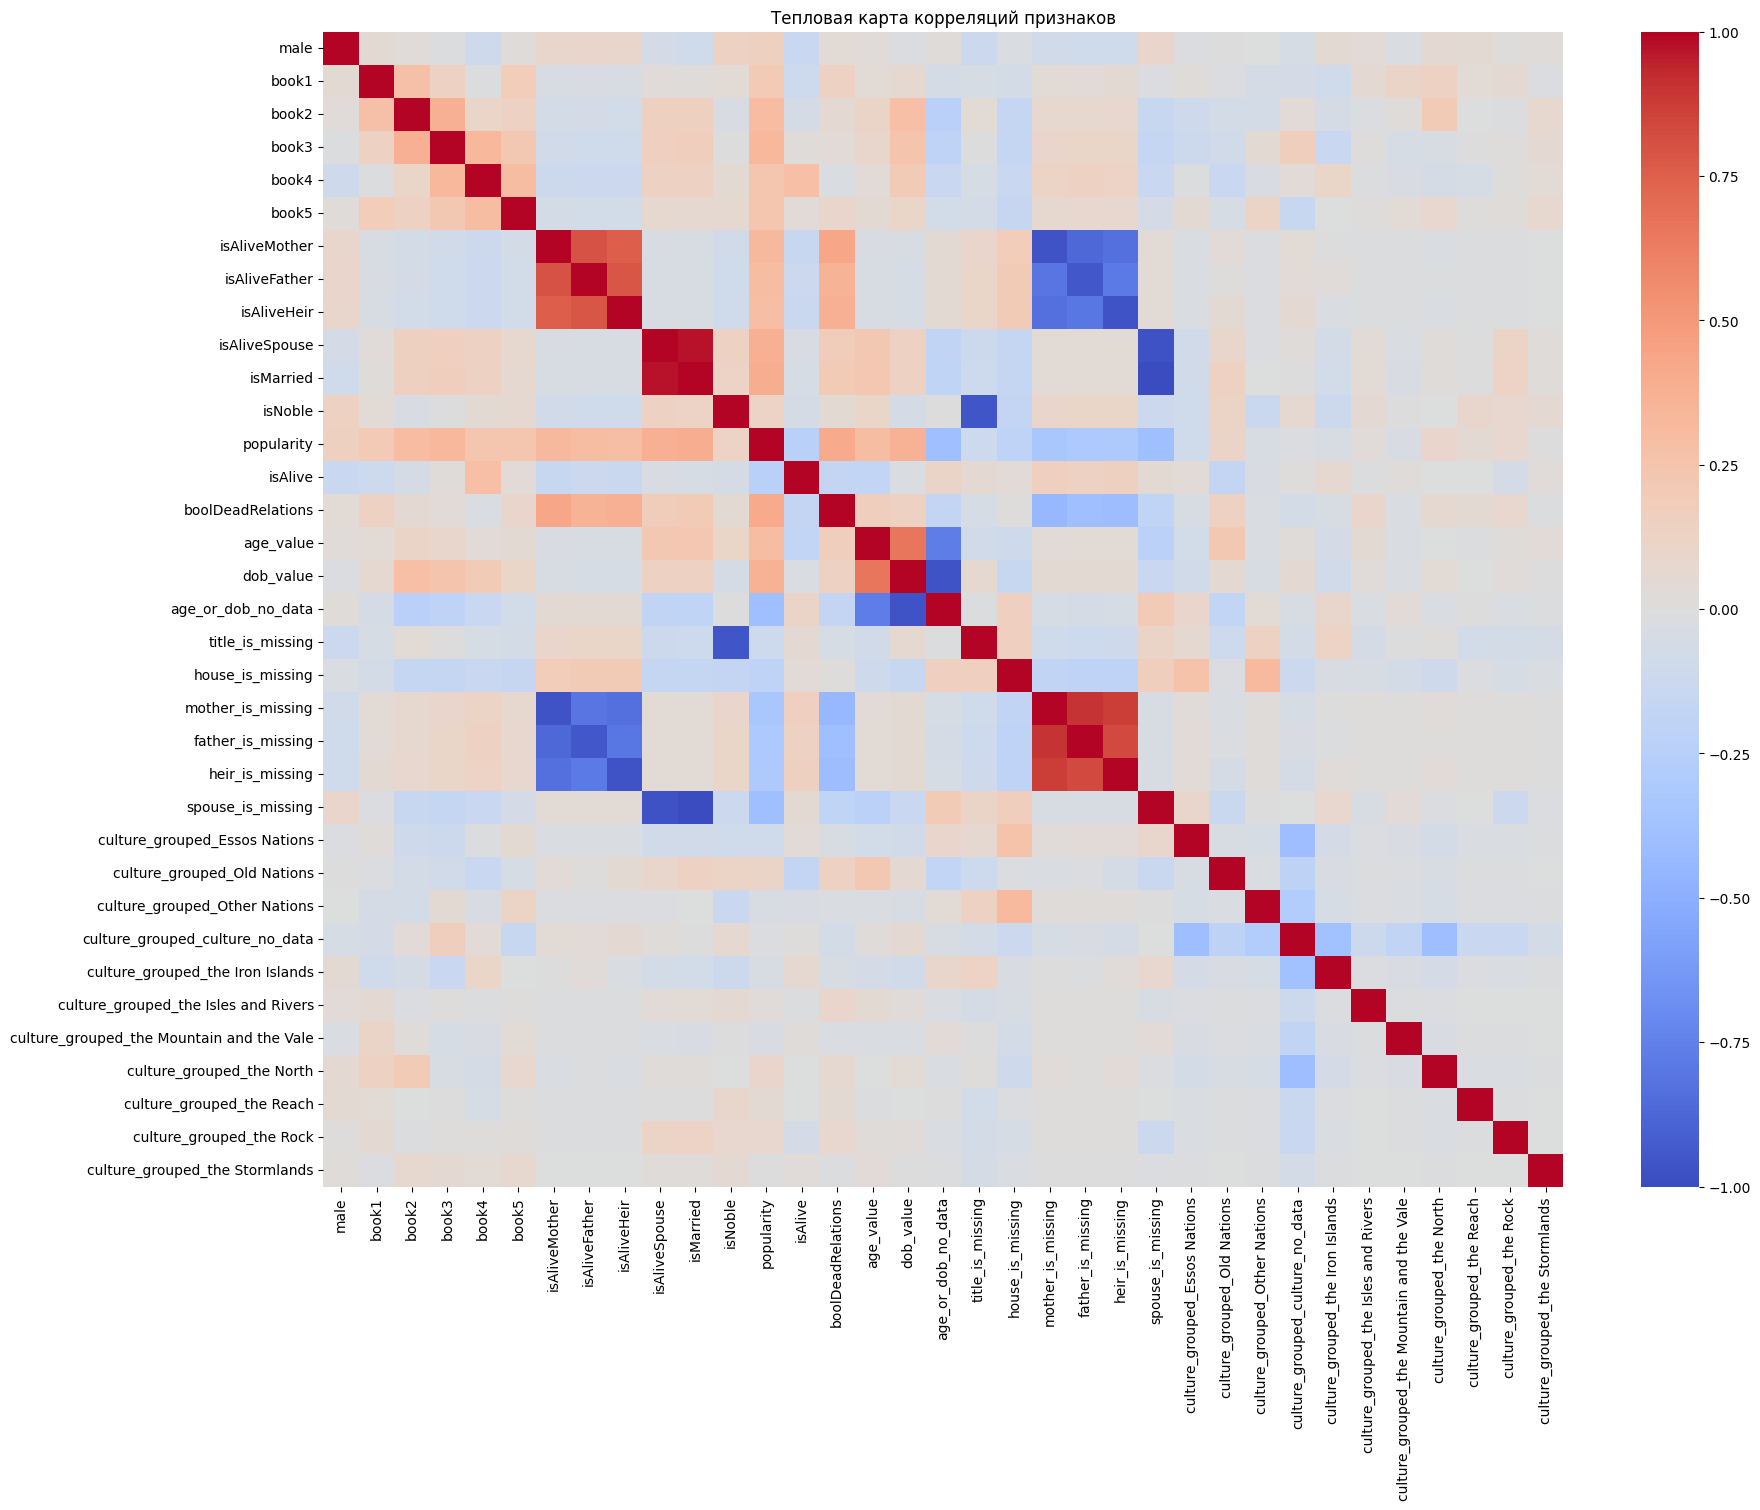

In [595]:
corr_matrix = data_copy.corr()

plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title('Тепловая карта корреляций признаков')
plt.show()

**Задание 1.8.** Проанализируйте влияние признаков на целевую переменную.

In [596]:
print("Корреляция признаков с целевой переменной 'isAlive':")
print(corr_matrix['isAlive'].sort_values(ascending=False))

Корреляция признаков с целевой переменной 'isAlive':
isAlive                                      1.000000
book4                                        0.284014
mother_is_missing                            0.159302
heir_is_missing                              0.152124
father_is_missing                            0.145771
age_or_dob_no_data                           0.113629
culture_grouped_the Iron Islands             0.064933
title_is_missing                             0.056242
spouse_is_missing                            0.049381
culture_grouped_Essos Nations                0.037287
house_is_missing                             0.033892
book5                                        0.032531
culture_grouped_the Stormlands               0.027077
culture_grouped_the Mountain and the Vale    0.018941
book3                                        0.018427
culture_grouped_culture_no_data              0.009564
culture_grouped_the North                   -0.000422
culture_grouped_the Reach    

**Задание 1.9.** Создайте переменные `X`, которая будет хранить только значения признаков, которые вы отобрали для включения в модель, и `y`, которая будет хранить только значения целевой переменной.

In [597]:
final_df = data_copy.copy()

y = final_df['isAlive']

X = final_df.drop('isAlive', axis=1)

**Задание 1.10.** Разделите датасет обучащую и валидационные части (train и val) при помощи функции `train_test_split` (https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

In [598]:
from sklearn.model_selection import train_test_split

In [599]:
TEST_SIZE = 0.2
RANDOM_STATE = 42

X_train, X_val, y_train, y_val = train_test_split(
    X,
    y,
    test_size=TEST_SIZE,
    random_state=RANDOM_STATE,
    stratify=y
)

## Часть 2. Обучение моделей

В данной части домашнего задания, мы хотим научиться обучать модели для задачи классификации на наших данных.

**Задание 2.1.**


Вым можете работать с одно из предложенных моделей из библиотеки `sklearn`
* LogisticRegression
* RandomForestClassifier
* AdaBoostClassifier
* GaussianProcessClassifier
* GaussianNB
* KNeighborsClassifier
* SVC
* DecisionTreeClassifier


Однако в этом домашнем задании мы предлагаем выбрать и поработать с моделью `LogisticRegression`.

In [600]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

Импортируйте остальные модели из библиотеки `sklearn`. Чтобы понять как это сделать, воспользуйтесь официальный документацией `sklearn` $→$ [тык](https://scikit-learn.org/dev/user_guide.html). По ключевому названию модели, вы сможете найти необходимую информацию о том, как можно импортировать модель из библиотеки.

**Задание 2.2.** Обучите модель и сделайте предсказание на тестовой выборке

В качестве примера, обучим модель `LogisticRegression` и сделаем на ней предсказания на тестовой выборке.

In [601]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_val_scaled = scaler.transform(X_val)

# model_lr = LogisticRegression(random_state=2, max_iter=50)
# model_lr.fit(X_train_scaled, y_train)

# y_pred_val_lr = model_lr.predict(X_val_scaled)

In [602]:
from sklearn.ensemble import RandomForestClassifier

# Пример для RandomForest
model_rf = RandomForestClassifier(random_state=100)
model_rf.fit(X_train, y_train)
y_pred_val_rf = model_rf.predict(X_val)

## Часть 3. Оцените качество моделей

Вам необходимо познакомиться с метриками задачи классификации из sklearn. Оцените все модели и выберите лучшую по метрике качества Accuracy.

С метриками классификации вы можете ознакомиться в [Yandex ML Book](https://education.yandex.ru/handbook/ml/article/metriki-klassifikacii-i-regressii).

Для простоты в данном домашнем задании мы будем работать с самой базовой метрикой для задачи классификации - accuracy.

**Задание 3.1.** Вам необходимо посчитать метрику для всех моделей и выбрать лучшую модель.

Сначала импортируем необходимую функцию из библиотеки sklearn для подсчета accuracy.

In [603]:
from sklearn.metrics import accuracy_score

В качестве примера, посчитаем метрику accuracy для модели `LogisticRegression`

In [604]:
# 4. Оценка предсказания
accuracy_lorar = accuracy_score(y_val, y_pred_val)
print(f"Accuracy после масштабирования для LogisticRegression: {accuracy_lorar:.4f}")
accuracy_rf = accuracy_score(y_val, y_pred_val_rf)
print(f"Средняя точность RandomForest на кросс-валидации: {accuracy_rf:.4f}")

Accuracy после масштабирования для LogisticRegression: 0.7917
Средняя точность RandomForest на кросс-валидации: 0.8013


Возможно, вы решите вернуться на несколько шагов и попробовать другие варианты преобразования и подбора признаков в модель. **Выберите** лучшую модель.

### Тестовый датасет

В самом начале нашего домашнего задания мы скачивали тестовый датасет. Загрузите его в Pandas DataFrame при помощи функции read_csv

In [605]:
data_test = data_test.drop('isAlive', axis=1)
data_test

,male,book1,book2,book3,book4,book5,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,popularity,boolDeadRelations,age_value,dob_value,age_or_dob_no_data,title_is_missing,house_is_missing,mother_is_missing,father_is_missing,heir_is_missing,spouse_is_missing,culture_grouped_Essos Nations,culture_grouped_Old Nations,culture_grouped_Other Nations,culture_grouped_culture_no_data,culture_grouped_the Iron Islands,culture_grouped_the Isles and Rivers,culture_grouped_the Mountain and the Vale,culture_grouped_the North,culture_grouped_the Reach,culture_grouped_the Rock,culture_grouped_the Stormlands
S.No,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1558,0,0,0,0,0,1,-1.0,-1.0,-1.0,-1.0,0,0,0.050167,0,100.0,156.0,0,1,0,1,1,1,1,False,False,False,True,False,False,False,False,False,False,False
1559,0,0,1,1,1,1,-1.0,-1.0,-1.0,-1.0,0,0,0.745819,0,0.0,0.0,1,1,0,1,1,1,1,True,False,False,False,False,False,False,False,False,False,False
1560,0,0,0,1,1,0,-1.0,-1.0,-1.0,-1.0,0,0,0.010033,0,0.0,0.0,1,1,0,1,1,1,1,False,False,False,True,False,False,False,False,False,False,False
1561,1,1,1,1,1,1,-1.0,-1.0,-1.0,-1.0,0,1,0.220736,0,0.0,0.0,1,0,0,1,1,1,1,False,False,False,True,False,False,False,False,False,False,False
1562,1,1,1,1,1,1,-1.0,-1.0,-1.0,1.0,1,0,0.434783,0,38.0,262.0,0,1,0,1,1,1,0,False,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1942,1,1,1,1,1,1,-1.0,-1.0,-1.0,-1.0,0,0,0.351171,0,0.0,0.0,1,1,0,1,1,1,1,False,False,True,False,False,False,False,False,False,False,False
1943,1,0,1,0,1,1,-1.0,-1.0,-1.0,-1.0,0,0,0.096990,0,0.0,0.0,1,1,0,1,1,1,1,False,False,False,True,False,False,False,False,False,False,False
1944,1,1,1,1,1,1,-1.0,-1.0,-1.0,-1.0,0,0,0.030100,0,0.0,0.0,1,1,1,1,1,1,1,False,False,False,True,False,False,False,False,False,False,False


По аналогии с тем, как мы работали с обучающим датасетом, давайте посмотрим в тестовом датасете на статистики признаков с разными типами данных  

In [606]:
#Подсказка
data_test.loc[data_test['age_value']<0] # Находим данные с ошибками в дате рождения и возрасте

,male,book1,book2,book3,book4,book5,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,popularity,boolDeadRelations,age_value,dob_value,age_or_dob_no_data,title_is_missing,house_is_missing,mother_is_missing,father_is_missing,heir_is_missing,spouse_is_missing,culture_grouped_Essos Nations,culture_grouped_Old Nations,culture_grouped_Other Nations,culture_grouped_culture_no_data,culture_grouped_the Iron Islands,culture_grouped_the Isles and Rivers,culture_grouped_the Mountain and the Vale,culture_grouped_the North,culture_grouped_the Reach,culture_grouped_the Rock,culture_grouped_the Stormlands
S.No,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1685,0,1,1,0,0,1,-1.0,-1.0,-1.0,-1.0,0,0,0.110368,0,-277980.0,278279.0,0,1,0,1,1,1,1,True,False,False,False,False,False,False,False,False,False,False
1869,0,1,1,1,1,0,-1.0,-1.0,-1.0,-1.0,0,0,0.167224,0,-298001.0,298299.0,0,1,0,1,1,1,1,False,False,False,True,False,False,False,False,False,False,False


In [607]:
#Вы можете аккуратно поправить тестовые данные, воспользовавшись, например следующим кодом:
data_test.loc[1685, 'dob_value'] = 278
data_test.loc[1685, 'age_value'] = 0
data_test.loc[1869, 'dob_value'] = 299
data_test.loc[1869, 'age_value'] = 0
# замены в строке 1685: dateOfBirth -> 278. и age -> 0.
# замены в строке 1869: dateOfBirth -> 299. и age -> 0.

Преобразуйте признаки в тестовом датасете по тому же пайплайну, как вы преобразовывали обучающие данные. Примените вашу лучшую модель на тестовом датасете для получения прогноза целевой переменной `isAlive`

In [608]:
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(data_test)
test_predictions = model_lr.predict(X_test_scaled)

### Файл `submission.csv`

Вам нужно вместо значений в `submission.csv` файле в колонке `isAlive`, подставить свои предсказания и сохранить измененный файл.

In [609]:
!gdown 1M14conWjAW2QLoyCXbHEAy8bql2f99eF

Downloading...
From: https://drive.google.com/uc?id=1M14conWjAW2QLoyCXbHEAy8bql2f99eF
To: /content/submission.csv
100% 2.74k/2.74k [00:00<00:00, 9.61MB/s]


In [610]:
submission = pd.read_csv("/content/submission.csv", index_col='S.No')

In [611]:
submission['isAlive'] = test_predictions
submission

,isAlive
S.No,
1558,0
1559,1
1560,1
1561,1
1562,1
...,...
1942,1
1943,1
1944,1


Как сохранить измененный Pandas DataFrame в csv файл:

In [612]:
submission.to_csv("/content/new_submission.csv", index=False)